示例

数据库  D:\\Desk\\CoCrNiV论文pandat\\计算数据\\第三次重做\\新占位对比\\CoCrNi\\bcc+fcc+hcp_by-hamid-cxy-wubo-20250516.TDB

占位数据  D:\\Desk\\CoCrNiV论文pandat\\计算数据\\第三次重做\\新占位对比\\CoCrNi\\YSITE-T_output.xlsx

excel文件夹  D:\\Desk\\CoCrNiV论文pandat\\计算数据\\第三次重做\\新占位对比\\数据处理

根据G-T.exp文件批量生成G-T

In [2]:
import os
import pandas as pd

def parse_file(file_path):
    """
    解析G-T.EXP文件，提取所有数据点（T, G）。
    数据块以行包含三个令牌且第三个令牌为'M'开始，继续读取后续两个令牌的行直到遇到非数值行。
    """
    data_points = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if not line:
            i += 1
            continue
        tokens = line.split()
        if len(tokens) == 3 and tokens[2] == 'M':
            try:
                T = float(tokens[0])
                G = float(tokens[1])
                data_points.append((T, G))
                i += 1
                # 继续读取后续行，直到遇到非数值行
                while i < len(lines):
                    next_line = lines[i].strip()
                    if not next_line:
                        i += 1
                        continue
                    next_tokens = next_line.split()
                    if len(next_tokens) == 2:
                        try:
                            T_next = float(next_tokens[0])
                            G_next = float(next_tokens[1])
                            data_points.append((T_next, G_next))
                            i += 1
                        except ValueError:
                            break
                    else:
                        break
            except ValueError:
                i += 1
        else:
            i += 1
    return data_points

def main():
    root_dir = input("请输入根目录路径: ").strip()
    if not os.path.isdir(root_dir):
        print("错误：输入的路径不存在或不是目录。")
        return
    
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if "G-T.EXP" in filenames:
            exp_file_path = os.path.join(dirpath, "G-T.EXP")
            print(f"处理文件: {exp_file_path}")
            data_points = parse_file(exp_file_path)
            if data_points:
                df = pd.DataFrame(data_points, columns=['T', 'G'])
                df.sort_values(by='T', inplace=True)
                output_path = os.path.join(dirpath, "G-T.xlsx")
                df.to_excel(output_path, index=False)
                print(f"已保存: {output_path}")
            else:
                print(f"在文件 {exp_file_path} 中未找到数据。")

if __name__ == "__main__":
    main()

处理文件: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\(CoCrNi)92V8\G-T.EXP
已保存: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\(CoCrNi)92V8\G-T.xlsx
处理文件: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\(CoCrNi)95V5\G-T.EXP
已保存: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\(CoCrNi)95V5\G-T.xlsx
处理文件: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\(CoCrNi)96V4\G-T.EXP
已保存: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\(CoCrNi)96V4\G-T.xlsx
处理文件: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoCrFeNi\G-T.EXP
已保存: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoCrFeNi\G-T.xlsx
处理文件: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoCrMnNi\G-T.EXP
已保存: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoCrMnNi\G-T.xlsx
处理文件: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoCrNi\G-T.EXP
已保存: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoCrNi\G-T.xlsx
处理文件: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoNiV\G-T.EXP
已保存: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoNiV\G-T.xlsx


编写一个python脚本完成以下任务，现定义以下参数的计算方法1.端基的生成吉布斯自由能G(x)：根据“bcc+fcc+hcp_by-hamid-cxy-wubo-20250516.TDB”文件（内容类似1.txt），读取“FUNCTION SERx”（x为英文大写元素名，如V、FE等）后的内容直到出现“;”为止（合并跨行内容），定义为“G(x)”的方程（x为英文大写元素名，如V、FE等）。2.生成焓deltaG(x:x)：读取“PARAMETER G(y,x:x;0)”（y为BCC或FCC，x为英文大写元素名，如V、FE等）后的内容直到出现“;”为止（合并跨行内容），定义为“deltaG(x:x)”的方程（x为英文大写元素名，如V、FE等，该方程中出现的SERx#（x为英文大写元素名，如V、FE等）在计算时代入对应的“G(x)”的方程.该方程中出现的T在计算时代入“YSITE-T_output.xlsx”文件中读取到的T值）。3.有序Sigma(deltaG)：读取“YSITE-T_output.xlsx”文件（该文件第一行为表头，后续行为对应数值，第一列为温度T，后续列统称为元素列，前一半为主晶格元素列,后一半带#2的为亚晶格元素列），以元素列"CO,NI,CO#2,NI#2"为例,有序Sigma(deltaG)的计算方法为“CO值*CO#2值*G(CO:CO)+CO值*NI#2值*G(CO:NI)+NI值*CO#2值*G(NI:CO)+NI值*NI#2值*G(NI:NI)",更多元或更多元素的计算方法以此类推.4.无序Sigma(deltaG)：根据用户输入的化学式,如CO0.3CR0.3NI0.4（不区分大小写),生成对应元素的主晶格元素列和亚晶格元素列,并且定义值都为“0.3,0.3,0.4",定义此时温度T的范围为“100至1700",步长为“1".无序Sigma(deltaG)的计算方法与有序Sigma(deltaG)的计算方法类似.5.构型熵Sconfig:定义为“-8.314*(0.25*∑(主晶格元素列值*LN(主晶格元素列值))+0.75*∑(亚晶格元素列值*LN(亚晶格元素列值)))",如以元素列"CO,NI,CO#2,NI#2"为例,计算方程为“-8.314*(0.25*(CO值*LN(CO值)+NI值*LN(NI值))+0.75*(CO#2值*LN(CO#2值)+NI#2值*LN(NI#2值))".6.吉布斯自由能G:定义为“Sigma(deltaG)-T*Sconfig".    最终根据用户需要输入的信息得到对应文件:晶体结构FCC/BCC（用于检索G(x:x)的计算方程,不区分大小写)→有序/无序→若输入有序,再要求输入“YSITE-T_output.xlsx”文件地址,最终输出“有序G-T.xlsx"（第一行表头信息为“T,Sigma(deltaG),Sconfig,G")与一个“G(x).xlsx”文件,用于存储本次计算中涉及到的1000K下的deltaG(x:x),G(x)值（标注出对应元素和对应的值）.若输入无序,再要求输入化学式,最终输出“无序G-T.xlsx"（第一行表头信息为“T,Sigma(deltaG),Sconfig,G")与一个“G(x).xlsx”文件,用于存储本次计算中涉及到的1000K下的deltaG(x:x),G(x)值（标注出对应元素和对应的值）.

1.有序/无序,根据YSITE-T_output.xlsx文件生成G-T

In [27]:
import pandas as pd
import numpy as np
import re
import math
from openpyxl import Workbook
import os

class GibbsCalculator:
    def __init__(self, tdb_file_path):
        self.tdb_content = self.read_tdb_file(tdb_file_path)
        self.function_dict = self.parse_functions()
        self.parameter_dict = self.parse_parameters()
        
    def read_tdb_file(self, file_path):
        """读取TDB文件内容"""
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        return content
    
    def parse_functions(self):
        """解析FUNCTION部分"""
        function_dict = {}
        # 匹配FUNCTION SERx模式
        pattern = r'FUNCTION (SER[A-Z]+)\s+([^;]+);'
        matches = re.findall(pattern, self.tdb_content, re.DOTALL)
        
        for func_name, expression in matches:
            element = func_name.replace('SER', '')
            # 清理表达式中的多余空格和换行
            cleaned_expr = ' '.join(expression.split())
            function_dict[element] = cleaned_expr
            
        return function_dict
    
    def parse_parameters(self):
        """解析PARAMETER部分"""
        parameter_dict = {}
        # 匹配PARAMETER G(PHASE,ELEM1:ELEM2;0)模式
        pattern = r'PARAMETER G\(([A-Z]+),([A-Z]+):([A-Z]+);0\)\s+([^;]+);'
        matches = re.findall(pattern, self.tdb_content, re.DOTALL)
        
        for phase, elem1, elem2, expression in matches:
            # 清理表达式
            cleaned_expr = ' '.join(expression.split())
            key = f"{phase}_{elem1}:{elem2}"
            parameter_dict[key] = cleaned_expr
            
        return parameter_dict
    
    def evaluate_expression(self, expression, T, element_functions=None):
        """计算表达式的值"""
        if element_functions is None:
            element_functions = {}
            
        # 替换SERx#为对应的函数值
        for elem, func_expr in element_functions.items():
            ser_pattern = f"SER{elem}#"
            if ser_pattern in expression:
                # 计算该元素函数在温度T下的值
                elem_value = self.evaluate_single_function(func_expr, T)
                expression = expression.replace(ser_pattern, str(elem_value))
        
        # 替换T变量
        expr_with_T = expression.replace('T', str(T))
        
        try:
            # 安全地计算表达式
            # 注意：这里需要处理LN函数，在Python中是math.log
            expr_with_T = expr_with_T.replace('LN', 'math.log')
            # 确保所有数学运算都被正确处理
            result = eval(expr_with_T, {'math': math, '__builtins__': {}})
            return result
        except Exception as e:
            print(f"计算表达式时出错: {expression}")
            print(f"错误: {e}")
            return 0
    
    def evaluate_single_function(self, expression, T):
        """计算单个函数的值"""
        expr_with_T = expression.replace('T', str(T))
        expr_with_T = expr_with_T.replace('LN', 'math.log')
        
        try:
            result = eval(expr_with_T, {'math': math, '__builtins__': {}})
            return result
        except:
            return 0
    
    def calculate_ordered_sigma_deltaG(self, df, phase, elements):
        """计算有序情况下的Sigma(deltaG)"""
        results = []
        
        for _, row in df.iterrows():
            T = row['T']
            total_deltaG = 0
            
            # 获取主晶格和亚晶格元素
            main_elements = [elem for elem in elements if '#2' not in elem]
            sub_elements = [elem.replace('#2', '') for elem in elements if '#2' in elem]
            
            # 计算所有组合
            for main_elem in main_elements:
                for sub_elem in sub_elements:
                    main_value = row[main_elem]
                    sub_value = row[f"{sub_elem}#2"]
                    
                    # 获取对应的deltaG参数
                    param_key = f"{phase}_{main_elem}:{sub_elem}"
                    if param_key in self.parameter_dict:
                        param_expr = self.parameter_dict[param_key]
                        deltaG_value = self.evaluate_expression(
                            param_expr, T, self.function_dict
                        )
                        total_deltaG += main_value * sub_value * deltaG_value
            
            results.append(total_deltaG)
        
        return results
    
    def calculate_disordered_sigma_deltaG(self, composition, phase, T_range):
        """计算无序情况下的Sigma(deltaG)"""
        # 解析化学式
        elements, concentrations = self.parse_composition(composition)
        
        results = []
        T_values = []
        
        for T in T_range:
            total_deltaG = 0
            
            # 对于无序情况，主晶格和亚晶格浓度相同
            for i, elem1 in enumerate(elements):
                for j, elem2 in enumerate(elements):
                    conc1 = concentrations[i]
                    conc2 = concentrations[j]
                    
                    # 获取对应的deltaG参数
                    param_key = f"{phase}_{elem1}:{elem2}"
                    if param_key in self.parameter_dict:
                        param_expr = self.parameter_dict[param_key]
                        deltaG_value = self.evaluate_expression(
                            param_expr, T, self.function_dict
                        )
                        total_deltaG += conc1 * conc2 * deltaG_value
            
            results.append(total_deltaG)
            T_values.append(T)
        
        return T_values, results, elements, concentrations
    
    def parse_composition(self, composition):
        """解析化学式如CO0.3CR0.3NI0.4"""
        elements = []
        concentrations = []
        
        # 使用正则表达式匹配元素和浓度
        pattern = r'([A-Za-z]+)(\d+\.?\d*)'
        matches = re.findall(pattern, composition.upper())
        
        for elem, conc in matches:
            elements.append(elem)
            concentrations.append(float(conc))
        
        # 归一化浓度（确保总和为1）
        total = sum(concentrations)
        if total != 1.0:
            concentrations = [c/total for c in concentrations]
        
        return elements, concentrations
    
    def calculate_sconfig(self, concentrations_main, concentrations_sub):
        """计算构型熵"""
        entropy1 = 0
        entropy2 = 0
        
        # 主晶格贡献
        for conc in concentrations_main:
            if conc > 0:
                entropy1 += conc * math.log(conc)
        
        # 亚晶格贡献
        for conc in concentrations_sub:
            if conc > 0:
                entropy2 += conc * math.log(conc)
        
        return -8.314 * (0.25 * entropy1 + 0.75 * entropy2)
    
    def calculate_ordered_sconfig(self, df, elements):
        """计算有序情况的构型熵"""
        results = []
        
        for _, row in df.iterrows():
            # 获取主晶格和亚晶格浓度
            main_concentrations = [row[elem] for elem in elements if '#2' not in elem]
            sub_concentrations = [row[elem] for elem in elements if '#2' in elem]
            
            sconfig = self.calculate_sconfig(main_concentrations, sub_concentrations)
            results.append(sconfig)
        
        return results
    
    def calculate_disordered_sconfig(self, concentrations, T_range):
        """计算无序情况的构型熵"""
        # 对于无序情况，主晶格和亚晶格浓度相同
        return [self.calculate_sconfig(concentrations, concentrations) for _ in T_range]
    
    def generate_gx_report(self, phase, elements, T=1000):
        """生成G(x)和deltaG(x:x)的报告"""
        report_data = []
        
        # 计算G(x)值
        for elem, func_expr in self.function_dict.items():
            if elem in [e.replace('#2', '') for e in elements]:
                gx_value = self.evaluate_single_function(func_expr, T)
                report_data.append({
                    'Type': 'G(x)',
                    'Element': elem,
                    'Value': gx_value,
                    'Expression': func_expr
                })
        
        # 计算deltaG(x:x)值
        unique_elements = list(set([e.replace('#2', '') for e in elements]))
        for elem1 in unique_elements:
            for elem2 in unique_elements:
                param_key = f"{phase}_{elem1}:{elem2}"
                if param_key in self.parameter_dict:
                    deltaG_value = self.evaluate_expression(
                        self.parameter_dict[param_key], T, self.function_dict
                    )
                    report_data.append({
                        'Type': 'deltaG(x:x)',
                        'Element': f"{elem1}:{elem2}",
                        'Value': deltaG_value,
                        'Expression': self.parameter_dict[param_key]
                    })
        
        return pd.DataFrame(report_data)

def main():
    print("吉布斯自由能计算器")
    print("=" * 50)
    
    # 输入TDB文件路径
    tdb_path = "D:\\Desk\\CoCrNiV论文pandat\\计算数据\\第三次重做\\新占位对比\\CoCrNi\\bcc+fcc+hcp_by-hamid-cxy-wubo-20250516.TDB"  # 或者让用户输入
    
    # 初始化计算器
    calculator = GibbsCalculator(tdb_path)
    
    # 用户输入
    crystal_structure = input("请输入晶体结构 (FCC/BCC): ").upper()
    calculation_type = input("请选择计算类型 (有序/无序): ")
    
    if calculation_type == "有序":
        # 有序计算
        excel_path = input("请输入YSITE-T_output.xlsx文件路径: ")
        
        try:
            # 读取Excel文件
            df = pd.read_excel(excel_path)
            
            # 获取元素列（排除T列）
            elements = [col for col in df.columns if col != 'T']
            
            # 计算各项
            sigma_deltaG = calculator.calculate_ordered_sigma_deltaG(df, crystal_structure, elements)
            sconfig = calculator.calculate_ordered_sconfig(df, elements)
            
            # 计算G
            G_values = [sigma_deltaG[i] - df.iloc[i]['T'] * sconfig[i] for i in range(len(df))]
            
            # 创建结果DataFrame
            result_df = pd.DataFrame({
                'T': df['T'],
                'Sigma(deltaG)': sigma_deltaG,
                'Sconfig': sconfig,
                'G': G_values
            })
            
            # 保存结果
            result_df.to_excel("有序G-T.xlsx", index=False)
            
            # 生成G(x)报告
            gx_report = calculator.generate_gx_report(crystal_structure, elements)
            gx_report.to_excel("G(x).xlsx", index=False)
            
            print("计算完成！")
            print("结果已保存到: 有序G-T.xlsx 和 G(x).xlsx")
            
        except Exception as e:
            print(f"读取Excel文件时出错: {e}")
    
    elif calculation_type == "无序":
        # 无序计算
        composition = input("请输入化学式 (如CO0.3CR0.3NI0.4): ")
        
        # 定义温度范围
        T_range = range(100, 1701)  # 100到1700，步长1
        
        # 计算各项
        T_values, sigma_deltaG, elements, concentrations = calculator.calculate_disordered_sigma_deltaG(
            composition, crystal_structure, T_range
        )
        sconfig = calculator.calculate_disordered_sconfig(concentrations, T_range)
        
        # 计算G
        G_values = [sigma_deltaG[i] - T_values[i] * sconfig[i] for i in range(len(T_values))]
        
        # 创建结果DataFrame
        result_df = pd.DataFrame({
            'T': T_values,
            'Sigma(deltaG)': sigma_deltaG,
            'Sconfig': sconfig,
            'G': G_values
        })
        
        # 保存结果
        result_df.to_excel("无序G-T.xlsx", index=False)
        
        # 生成G(x)报告
        gx_report = calculator.generate_gx_report(crystal_structure, elements)
        gx_report.to_excel("G(x).xlsx", index=False)
        
        print("计算完成！")
        print("结果已保存到: 无序G-T.xlsx 和 G(x).xlsx")
    
    else:
        print("无效的计算类型！")

if __name__ == "__main__":
    main()

吉布斯自由能计算器
计算完成！
结果已保存到: 有序G-T.xlsx 和 G(x).xlsx


2.读取“无序G-T.xlsx"和“有序G-T.xlsx"文件中第一行表头为"T","G"的列,绘制标题为“G-T",横坐标为T（K),纵坐标为G（J)的折线图在一张图上,显示图例,无序线段为红色,有序线段为蓝色,所有英文使用timesnewroman字体,横坐标范围为100-1700,纵坐标范围自适应

图片已保存至: D:\Desk\CoCrNiV论文pandat\计算数据\第三次重做\新占位对比\CoCrNi\G-T数据处理\G-T_plot.png


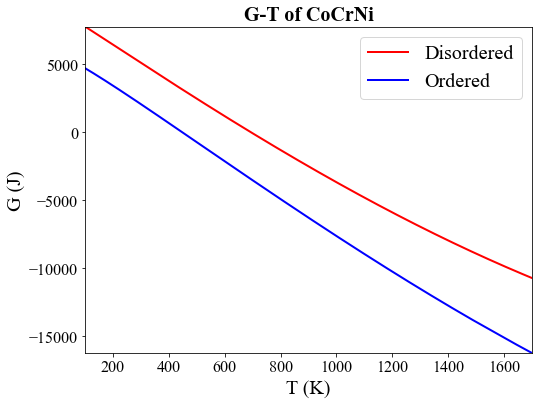

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

def plot_g_t_diagram(directory_path):
    # 设置全局字体为Times New Roman
    mpl.rcParams['font.family'] = 'Times New Roman'
    
    # 读取无序数据
    disordered_path = os.path.join(directory_path, "无序G-T.xlsx")
    disordered_df = pd.read_excel(disordered_path)
    
    # 读取有序数据
    ordered_path = os.path.join(directory_path, "有序G-T.xlsx")
    ordered_df = pd.read_excel(ordered_path)
    
    # 创建图形
    plt.figure(figsize=(8, 6))
    
    # 绘制无序数据（红色）
    plt.plot(disordered_df['T'], disordered_df['G'], 
             'r-', linewidth=2, label='Disordered')
    
    # 绘制有序数据（蓝色）
    plt.plot(ordered_df['T'], ordered_df['G'], 
             'b-', linewidth=2, label='Ordered')
    
    # 设置标题和坐标轴标签
    plt.title('G-T of CoCrNi', fontsize=20, fontweight='bold')
    plt.xlabel('T (K)', fontsize=20)
    plt.ylabel('G (J)', fontsize=20)
    
    # 设置坐标轴数字字号
    plt.xticks(fontsize=16)  # 设置X轴刻度数字字号
    plt.yticks(fontsize=16)  # 设置Y轴刻度数字字号
    
    # 设置坐标轴范围
    plt.xlim(100, 1700)  # 固定X轴范围
    
    # 添加图例并设置字号
    plt.legend(fontsize=20)
    
    # 自动调整纵坐标范围
    plt.autoscale(enable=True, axis='y', tight=True)
    
    # 保存图片
    output_path = os.path.join(directory_path, "G-T_plot.png")
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"图片已保存至: {output_path}")
    
    # 显示图形
    plt.show()

# 地址修改
directory_path ="D:\\Desk\\CoCrNiV论文pandat\\计算数据\\第三次重做\\新占位对比\\CoCrNi\\G-T数据处理"
plot_g_t_diagram(directory_path)